# Lab | Unsupervised learning intro

## Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 100.
2. Collect the audio features from the Spotify API.

After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [1]:
import pandas as pd
import time
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

## Preparing and scaling the dataframe

In [3]:
### I am using the dataframes exported before

In [2]:
top_1971_2021 = pd.read_csv(r'C:\Users\luana\github\spotify-song-recommender\csv_files\top_1971_2021.csv')
top_1971_2021

,song,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Levitating (feat. DaBaby),Dua Lipa & DaBaby,85,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,...,0.0674,0.915,102.977,audio_features,5nujrmhLynf4yMoMtj8AQF,spotify:track:5nujrmhLynf4yMoMtj8AQF,https://api.spotify.com/v1/tracks/5nujrmhLynf4...,https://api.spotify.com/v1/audio-analysis/5nuj...,203064.0,4.0
1,drivers license,Olivia Rodrigo,88,0.561,0.431,10.0,-8.810,1.0,0.0578,0.76800,...,0.1060,0.137,143.875,audio_features,5wANPM4fQCJwkGd4rN57mH,spotify:track:5wANPM4fQCJwkGd4rN57mH,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013.0,4.0
2,Save Your Tears,The Weeknd,90,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,...,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627.0,4.0
3,MONTERO (Call Me By Your Name),Lil Nas X,83,0.593,0.503,8.0,-6.725,0.0,0.2200,0.29300,...,0.4050,0.710,178.781,audio_features,1SC5rEoYDGUK4NfG82494W,spotify:track:1SC5rEoYDGUK4NfG82494W,https://api.spotify.com/v1/tracks/1SC5rEoYDGUK...,https://api.spotify.com/v1/audio-analysis/1SC5...,137704.0,4.0
4,Blinding Lights,The Weeknd,91,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,...,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,He's Gonna Step on You Again,John Kongos,28,0.712,0.874,0.0,-6.835,0.0,0.0328,0.01670,...,0.3510,0.705,107.083,audio_features,4Kqp11O4KoQ6cHAtH9Kf1x,spotify:track:4Kqp11O4KoQ6cHAtH9Kf1x,https://api.spotify.com/v1/tracks/4Kqp11O4KoQ6...,https://api.spotify.com/v1/audio-analysis/4Kqp...,260773.0,5.0
4905,Wild World,Yusuf / Cat Stevens,77,0.480,0.542,0.0,-8.510,1.0,0.0348,0.34500,...,0.1130,0.567,152.853,audio_features,7mjSHL2Eb0kAwiKbvNNyD9,spotify:track:7mjSHL2Eb0kAwiKbvNNyD9,https://api.spotify.com/v1/tracks/7mjSHL2Eb0kA...,https://api.spotify.com/v1/audio-analysis/7mjS...,200560.0,4.0
4906,Love Her Madly,The Doors,66,0.565,0.587,4.0,-7.393,0.0,0.0317,0.05730,...,0.0416,0.966,147.462,audio_features,3MFFDRC4wTN9JNGtzXsZlN,spotify:track:3MFFDRC4wTN9JNGtzXsZlN,https://api.spotify.com/v1/tracks/3MFFDRC4wTN9...,https://api.spotify.com/v1/audio-analysis/3MFF...,198467.0,4.0
4907,Amazing Grace,Judy Collins,45,0.192,0.263,3.0,-11.830,1.0,0.0332,0.94500,...,0.2030,0.196,87.747,audio_features,6Sueudn0VQA4AXRsFKQbFl,spotify:track:6Sueudn0VQA4AXRsFKQbFl,https://api.spotify.com/v1/tracks/6Sueudn0VQA4...,https://api.spotify.com/v1/audio-analysis/6Sue...,248693.0,4.0


In [3]:
genres = pd.read_csv(r'C:\Users\luana\github\spotify-song-recommender\csv_files\songs_genre.csv')
genres

,song,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,As It Was,Harry Styles,93,0.520,0.731,6,-5.338,0,0.0557,0.342000,...,0.3110,0.662,173.930,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4
1,Perfect,Ed Sheeran,88,0.599,0.448,8,-6.312,1,0.0232,0.163000,...,0.1060,0.168,95.050,audio_features,0tgVpDi06FyKpA1z0VMD4v,spotify:track:0tgVpDi06FyKpA1z0VMD4v,https://api.spotify.com/v1/tracks/0tgVpDi06FyK...,https://api.spotify.com/v1/audio-analysis/0tgV...,263400,3
2,STAR WALKIN' (League of Legends Worlds Anthem),Lil Nas X,90,0.637,0.715,2,-4.971,0,0.0455,0.148000,...,0.0892,0.308,141.872,audio_features,38T0tPVZHcPZyhtOcCP7pF,spotify:track:38T0tPVZHcPZyhtOcCP7pF,https://api.spotify.com/v1/tracks/38T0tPVZHcPZ...,https://api.spotify.com/v1/audio-analysis/38T0...,210576,4
3,Treat You Better,Shawn Mendes,84,0.444,0.819,10,-4.078,0,0.3410,0.106000,...,0.1070,0.747,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4
4,Dark Horse,Katy Perry & Juicy J,77,0.647,0.585,6,-6.123,1,0.0512,0.003140,...,0.1650,0.353,131.934,audio_features,4jbmgIyjGoXjY01XxatOx6,spotify:track:4jbmgIyjGoXjY01XxatOx6,https://api.spotify.com/v1/tracks/4jbmgIyjGoXj...,https://api.spotify.com/v1/audio-analysis/4jbm...,215672,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Starter,Marco Lys & Tube & Berger,45,0.719,0.954,1,-5.367,1,0.0656,0.000781,...,0.1000,0.614,124.037,audio_features,4oFlRoHqdnjfPm0tUUIvAq,spotify:track:4oFlRoHqdnjfPm0tUUIvAq,https://api.spotify.com/v1/tracks/4oFlRoHqdnjf...,https://api.spotify.com/v1/audio-analysis/4oFl...,178142,4
4313,Chromatic,Anti Up,61,0.607,0.914,0,-5.020,0,0.0547,0.000038,...,0.1650,0.781,128.032,audio_features,3FcKnF4nEwGxlwdAmRIogh,spotify:track:3FcKnF4nEwGxlwdAmRIogh,https://api.spotify.com/v1/tracks/3FcKnF4nEwGx...,https://api.spotify.com/v1/audio-analysis/3FcK...,202524,4
4314,I'm The Joker (feat. DJ Supreme),Darius Syrossian & DJ Supreme,43,0.802,0.889,10,-6.715,0,0.1100,0.005980,...,0.5540,0.883,129.025,audio_features,3SHFOtqLr93qSbz4OyqJYU,spotify:track:3SHFOtqLr93qSbz4OyqJYU,https://api.spotify.com/v1/tracks/3SHFOtqLr93q...,https://api.spotify.com/v1/audio-analysis/3SHF...,156299,4
4315,Slow Motion,Volaris,48,0.497,0.986,3,-5.892,1,0.0404,0.000337,...,0.1920,0.163,126.980,audio_features,6KCFVYOU3FOJcffbqkoBlx,spotify:track:6KCFVYOU3FOJcffbqkoBlx,https://api.spotify.com/v1/tracks/6KCFVYOU3FOJ...,https://api.spotify.com/v1/audio-analysis/6KCF...,204094,4


In [4]:
moods = pd.read_csv(r'C:\Users\luana\github\spotify-song-recommender\csv_files\songs_mood.csv')
moods

,song,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Made You Look,Meghan Trainor,95,0.838,0.525,10,-3.562,1,0.0665,0.3450,...,0.0771,0.884,144.981,audio_features,0QHEIqNKsMoOY5urbzN48u,spotify:track:0QHEIqNKsMoOY5urbzN48u,https://api.spotify.com/v1/tracks/0QHEIqNKsMoO...,https://api.spotify.com/v1/audio-analysis/0QHE...,134256,4
1,I Ain't Worried,OneRepublic,95,0.704,0.797,0,-5.927,1,0.0475,0.0826,...,0.0546,0.825,139.994,audio_features,4h9wh7iOZ0GGn8QVp4RAOB,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB,https://api.spotify.com/v1/tracks/4h9wh7iOZ0GG...,https://api.spotify.com/v1/audio-analysis/4h9w...,148486,4
2,As It Was,Harry Styles,94,0.520,0.731,6,-5.338,0,0.0557,0.3420,...,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
3,SNAP,Rosa Linn,93,0.565,0.636,0,-8.198,1,0.0638,0.1070,...,0.4470,0.525,170.010,audio_features,76OGwb5RA9h4FxQPT33ekc,spotify:track:76OGwb5RA9h4FxQPT33ekc,https://api.spotify.com/v1/tracks/76OGwb5RA9h4...,https://api.spotify.com/v1/audio-analysis/76OG...,179551,4
4,Until I Found You (with Em Beihold) - Em Beiho...,Stephen Sanchez & Em Beihold,93,0.551,0.550,10,-5.339,1,0.0286,0.7770,...,0.2020,0.342,101.190,audio_features,1Y3LN4zO1Edc2EluIoSPJN,spotify:track:1Y3LN4zO1Edc2EluIoSPJN,https://api.spotify.com/v1/tracks/1Y3LN4zO1Edc...,https://api.spotify.com/v1/audio-analysis/1Y3L...,176440,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,San Francisco (Be Sure to Wear Some Flowers In...,Scott McKenzie,58,0.495,0.670,7,-5.918,1,0.0284,0.0470,...,0.2190,0.478,112.443,audio_features,77qBwefBIdzymXNCuAI8YX,spotify:track:77qBwefBIdzymXNCuAI8YX,https://api.spotify.com/v1/tracks/77qBwefBIdzy...,https://api.spotify.com/v1/audio-analysis/77qB...,178933,4
3815,"Lullabye (Goodnight, My Angel)",Billy Joel,57,0.442,0.157,7,-13.791,1,0.0324,0.9480,...,0.2240,0.220,76.480,audio_features,4cURHmiuYii52BVbhrGbv0,spotify:track:4cURHmiuYii52BVbhrGbv0,https://api.spotify.com/v1/tracks/4cURHmiuYii5...,https://api.spotify.com/v1/audio-analysis/4cUR...,214400,4
3816,Have A Little Faith In Me,John Hiatt,57,0.446,0.410,0,-11.431,1,0.0289,0.7360,...,0.1220,0.318,156.274,audio_features,23EgnmfkdOsDK96ftbVv0Q,spotify:track:23EgnmfkdOsDK96ftbVv0Q,https://api.spotify.com/v1/tracks/23EgnmfkdOsD...,https://api.spotify.com/v1/audio-analysis/23Eg...,245000,4
3817,Fruits Of My Labor,Lucinda Williams,56,0.341,0.234,8,-12.307,1,0.0423,0.7030,...,0.1080,0.167,176.463,audio_features,31nItlXwgCCFpttS50Rbxf,spotify:track:31nItlXwgCCFpttS50Rbxf,https://api.spotify.com/v1/tracks/31nItlXwgCCF...,https://api.spotify.com/v1/audio-analysis/31nI...,288133,3


In [5]:
songs = pd.concat([top_1971_2021, genres, moods], axis=0)
songs

,song,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Levitating (feat. DaBaby),Dua Lipa & DaBaby,85,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,...,0.0674,0.915,102.977,audio_features,5nujrmhLynf4yMoMtj8AQF,spotify:track:5nujrmhLynf4yMoMtj8AQF,https://api.spotify.com/v1/tracks/5nujrmhLynf4...,https://api.spotify.com/v1/audio-analysis/5nuj...,203064.0,4.0
1,drivers license,Olivia Rodrigo,88,0.561,0.431,10.0,-8.810,1.0,0.0578,0.76800,...,0.1060,0.137,143.875,audio_features,5wANPM4fQCJwkGd4rN57mH,spotify:track:5wANPM4fQCJwkGd4rN57mH,https://api.spotify.com/v1/tracks/5wANPM4fQCJw...,https://api.spotify.com/v1/audio-analysis/5wAN...,242013.0,4.0
2,Save Your Tears,The Weeknd,90,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,...,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627.0,4.0
3,MONTERO (Call Me By Your Name),Lil Nas X,83,0.593,0.503,8.0,-6.725,0.0,0.2200,0.29300,...,0.4050,0.710,178.781,audio_features,1SC5rEoYDGUK4NfG82494W,spotify:track:1SC5rEoYDGUK4NfG82494W,https://api.spotify.com/v1/tracks/1SC5rEoYDGUK...,https://api.spotify.com/v1/audio-analysis/1SC5...,137704.0,4.0
4,Blinding Lights,The Weeknd,91,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,...,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,San Francisco (Be Sure to Wear Some Flowers In...,Scott McKenzie,58,0.495,0.670,7.0,-5.918,1.0,0.0284,0.04700,...,0.2190,0.478,112.443,audio_features,77qBwefBIdzymXNCuAI8YX,spotify:track:77qBwefBIdzymXNCuAI8YX,https://api.spotify.com/v1/tracks/77qBwefBIdzy...,https://api.spotify.com/v1/audio-analysis/77qB...,178933.0,4.0
3815,"Lullabye (Goodnight, My Angel)",Billy Joel,57,0.442,0.157,7.0,-13.791,1.0,0.0324,0.94800,...,0.2240,0.220,76.480,audio_features,4cURHmiuYii52BVbhrGbv0,spotify:track:4cURHmiuYii52BVbhrGbv0,https://api.spotify.com/v1/tracks/4cURHmiuYii5...,https://api.spotify.com/v1/audio-analysis/4cUR...,214400.0,4.0
3816,Have A Little Faith In Me,John Hiatt,57,0.446,0.410,0.0,-11.431,1.0,0.0289,0.73600,...,0.1220,0.318,156.274,audio_features,23EgnmfkdOsDK96ftbVv0Q,spotify:track:23EgnmfkdOsDK96ftbVv0Q,https://api.spotify.com/v1/tracks/23EgnmfkdOsD...,https://api.spotify.com/v1/audio-analysis/23Eg...,245000.0,4.0
3817,Fruits Of My Labor,Lucinda Williams,56,0.341,0.234,8.0,-12.307,1.0,0.0423,0.70300,...,0.1080,0.167,176.463,audio_features,31nItlXwgCCFpttS50Rbxf,spotify:track:31nItlXwgCCFpttS50Rbxf,https://api.spotify.com/v1/tracks/31nItlXwgCCF...,https://api.spotify.com/v1/audio-analysis/31nI...,288133.0,3.0


In [6]:
songs = songs.drop(columns=['popularity','type', 'uri', 'track_href','analysis_url'], axis=1).dropna().drop_duplicates(['id']).reset_index(drop=True)
songs

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Levitating (feat. DaBaby),Dua Lipa & DaBaby,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,5nujrmhLynf4yMoMtj8AQF,203064.0,4.0
1,drivers license,Olivia Rodrigo,0.561,0.431,10.0,-8.810,1.0,0.0578,0.76800,0.000014,0.1060,0.137,143.875,5wANPM4fQCJwkGd4rN57mH,242013.0,4.0
2,Save Your Tears,The Weeknd,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,5QO79kh1waicV47BqGRL3g,215627.0,4.0
3,MONTERO (Call Me By Your Name),Lil Nas X,0.593,0.503,8.0,-6.725,0.0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,1SC5rEoYDGUK4NfG82494W,137704.0,4.0
4,Blinding Lights,The Weeknd,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,San Francisco (Be Sure to Wear Some Flowers In...,Scott McKenzie,0.495,0.670,7.0,-5.918,1.0,0.0284,0.04700,0.000025,0.2190,0.478,112.443,77qBwefBIdzymXNCuAI8YX,178933.0,4.0
9515,"Lullabye (Goodnight, My Angel)",Billy Joel,0.442,0.157,7.0,-13.791,1.0,0.0324,0.94800,0.000000,0.2240,0.220,76.480,4cURHmiuYii52BVbhrGbv0,214400.0,4.0
9516,Have A Little Faith In Me,John Hiatt,0.446,0.410,0.0,-11.431,1.0,0.0289,0.73600,0.000000,0.1220,0.318,156.274,23EgnmfkdOsDK96ftbVv0Q,245000.0,4.0
9517,Fruits Of My Labor,Lucinda Williams,0.341,0.234,8.0,-12.307,1.0,0.0423,0.70300,0.000674,0.1080,0.167,176.463,31nItlXwgCCFpttS50Rbxf,288133.0,3.0


In [7]:
songs.to_csv(r'C:\Users\luana\github\spotify-song-recommender\csv_files\songs.csv', index = False, header=True)

In [8]:
X = songs.select_dtypes(np.number)
y = songs['song']
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064.0,4.0
1,0.561,0.431,10.0,-8.810,1.0,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013.0,4.0
2,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627.0,4.0
3,0.593,0.503,8.0,-6.725,0.0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704.0,4.0
4,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,0.495,0.670,7.0,-5.918,1.0,0.0284,0.04700,0.000025,0.2190,0.478,112.443,178933.0,4.0
9515,0.442,0.157,7.0,-13.791,1.0,0.0324,0.94800,0.000000,0.2240,0.220,76.480,214400.0,4.0
9516,0.446,0.410,0.0,-11.431,1.0,0.0289,0.73600,0.000000,0.1220,0.318,156.274,245000.0,4.0
9517,0.341,0.234,8.0,-12.307,1.0,0.0423,0.70300,0.000674,0.1080,0.167,176.463,288133.0,3.0


In [10]:
scaler = StandardScaler().fit(X)
joblib.dump(scaler, 'scaler.save') # saving scaler to use in the recommender
X_prep = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_prep

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.663822,0.847100,0.220299,0.857899,-1.367709,-0.134736,-0.900416,-0.545312,-0.726373,1.533031,-0.554149,-0.355559,0.226552
1,-0.082635,-0.545156,1.339462,0.214975,0.731150,-0.168135,1.279569,-0.545270,-0.465312,-1.325904,0.906981,0.159521,0.226552
2,0.547354,0.850634,-1.458444,0.640306,0.731150,-0.558764,-0.864895,-0.545275,2.490229,0.537181,-0.015612,-0.189420,0.226552
3,0.086773,-0.290733,0.779881,0.481847,-1.367709,2.187255,-0.084411,-0.545312,1.556900,0.779713,2.154040,-1.219911,0.226552
4,-0.331455,0.511404,-1.178653,0.583091,0.731150,-0.139092,-0.921579,-0.545034,-0.575553,-0.601983,1.876233,-0.395550,0.226552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,-0.432041,0.299385,0.500090,0.585139,0.731150,-0.595068,-0.790809,-0.545238,0.298936,-0.072823,-0.215965,-0.674679,0.226552
9515,-0.712625,-1.513374,0.500090,-0.422573,0.731150,-0.536982,1.796445,-0.545312,0.332752,-1.020901,-1.500786,-0.205646,0.226552
9516,-0.691449,-0.619362,-1.458444,-0.120503,0.731150,-0.587807,1.187679,-0.545312,-0.357100,-0.660779,1.349951,0.199023,0.226552
9517,-1.247321,-1.241284,0.779881,-0.232627,0.731150,-0.393219,1.092919,-0.543348,-0.451785,-1.215662,2.071227,0.769434,-2.204733


## Choosing k and clustering

### Elbow method

CPU times: total: 7min 11s
Wall time: 1min 7s


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

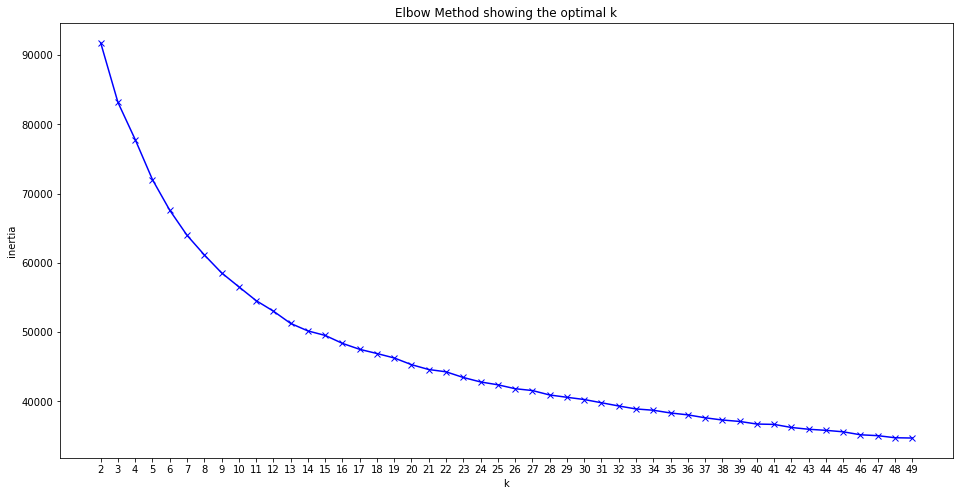

In [12]:
%%time
K = range(2, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [13]:
%%time

kmeans = KMeans(n_clusters=40,random_state=1234)
model = kmeans.fit(X_prep)
joblib.dump(model, 'model.save') # saving model to use in the recommender
clusters = model.predict(X_prep)
display(pd.Series(clusters).value_counts().sort_index())


0     180
1     606
2     170
3     495
4     232
5     201
6     301
7     371
8     339
9     145
10    217
11    235
12    537
13    177
14     14
15     73
16    181
17    247
18    209
19    191
20    419
21    240
22    158
23    249
24    199
25    181
26    229
27    228
28    177
29    171
30    323
31    400
32    121
33     56
34    288
35    203
36    214
37     17
38    276
39    249
dtype: int64

CPU times: total: 10.6 s
Wall time: 1.52 s


In [14]:
songs_clustered = songs
songs_clustered['cluster']= clusters
songs_clustered

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
0,Levitating (feat. DaBaby),Dua Lipa & DaBaby,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,5nujrmhLynf4yMoMtj8AQF,203064.0,4.0,31
1,drivers license,Olivia Rodrigo,0.561,0.431,10.0,-8.810,1.0,0.0578,0.76800,0.000014,0.1060,0.137,143.875,5wANPM4fQCJwkGd4rN57mH,242013.0,4.0,26
2,Save Your Tears,The Weeknd,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,5QO79kh1waicV47BqGRL3g,215627.0,4.0,6
3,MONTERO (Call Me By Your Name),Lil Nas X,0.593,0.503,8.0,-6.725,0.0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,1SC5rEoYDGUK4NfG82494W,137704.0,4.0,25
4,Blinding Lights,The Weeknd,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040.0,4.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,San Francisco (Be Sure to Wear Some Flowers In...,Scott McKenzie,0.495,0.670,7.0,-5.918,1.0,0.0284,0.04700,0.000025,0.2190,0.478,112.443,77qBwefBIdzymXNCuAI8YX,178933.0,4.0,8
9515,"Lullabye (Goodnight, My Angel)",Billy Joel,0.442,0.157,7.0,-13.791,1.0,0.0324,0.94800,0.000000,0.2240,0.220,76.480,4cURHmiuYii52BVbhrGbv0,214400.0,4.0,39
9516,Have A Little Faith In Me,John Hiatt,0.446,0.410,0.0,-11.431,1.0,0.0289,0.73600,0.000000,0.1220,0.318,156.274,23EgnmfkdOsDK96ftbVv0Q,245000.0,4.0,0
9517,Fruits Of My Labor,Lucinda Williams,0.341,0.234,8.0,-12.307,1.0,0.0423,0.70300,0.000674,0.1080,0.167,176.463,31nItlXwgCCFpttS50Rbxf,288133.0,3.0,35


In [16]:
songs_clustered.to_csv(r'C:\Users\luana\github\spotify-song-recommender\csv_files\songs_clustered.csv', index = False, header=True)